In [ ]:
# %%
"""
Post CRUD 연산의 예시 사용법 (노트북 - 한글 주석 및 설명 추가)
"""
import sys
from pathlib import Path

# 노트북 환경 등에서 __file__ 미정의 이슈 방지 함수
def get_project_root():
    # __file__이 정의되어 있는 경우(스크립트 실행)
    try:
        return Path(__file__).resolve().parents[3]
    except NameError:
        # __file__이 없으면(노트북 등), 작업 디렉토리에서 'app' 폴더가 포함된 경로 검색
        cwd = Path.cwd()
        for parent in [cwd, *cwd.parents]:
            if (parent / "app").is_dir():
                return parent
        return cwd

# 프로젝트 루트 경로를 PYTHONPATH에 추가 (임포트 오류 방지)
PROJECT_ROOT = get_project_root()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from app.db.config.base import SessionLocal
from app.db.crud.post import (
    get_posts,
    get_post_by_id,
    get_posts_by_company_id,
    get_posts_with_skills,
    count_posts,
    get_posts_by_skill_name
)

import pandas as pd  # 데이터프레임 생성을 위해 pandas 임포트

def main():
    """Post 테이블에 대한 CRUD 기능 테스트"""
    db = SessionLocal()  # SQLAlchemy 세션 생성

    df = None  # 사전 선언으로 UnboundLocalError 예방

    try:
        print("="*80)
        print("POST CRUD 연산 테스트 예시")
        print("="*80)

        # 1. 전체 게시글 개수 확인
        total = count_posts(db)
        print(f"\n1. DB에 저장된 게시글 수: {total}")

        # 2. 첫 30개 게시글 가져오기
        print("\n2. 게시글 30개 조회...")
        posts = get_posts(db, skip=0, limit=30)
        print(f"   → {len(posts)}개의 게시글을 조회함")

        if posts:
            print("\n   ▶ 게시글 샘플:")
            sample = posts[0]
            print(f"   - ID: {sample.id}")
            print(f"   - 제목: {sample.title}")
            print(f"   - 소속 회사: {sample.company.name if sample.company else 'N/A'}")
            print(f"   - 원본 URL: {sample.source_url}")

        # 3. 게시글 ID로 상세 조회
        if posts:
            post_id = posts[0].id
            print(f"\n3. ID={post_id} 게시글 상세조회...")
            post = get_post_by_id(db, post_id)
            if post:
                print(f"   ✓ {post.title} (조회 성공)")

        # 4. 게시글 + 보유 스킬 가져오기
        print("\n4. 게시글별 스킬 정보 조회 (5개)...")
        posts_with_skills = get_posts_with_skills(db, skip=0, limit=5)
        for i, post in enumerate(posts_with_skills, 1):
            skills = getattr(post, "skills", [])
            print(f"   {i}. {post.title[:50]}...")
            print(f"     - 보유 스킬 {len(skills)}개")
            if skills:
                print(f"     - 예시: {', '.join([s.name for s in skills[:3]])}")

        # 5. 회사 ID로 게시글 조회
        if posts and posts[0].company_id:
            company_id = posts[0].company_id
            print(f"\n5. 회사 ID={company_id}의 게시글 조회...")
            company_posts = get_posts_by_company_id(db, company_id, limit=10)
            print(f"   → 해당 회사의 게시글: {len(company_posts)}개")

        # 6. 스킬명으로 게시글 조회 + 데이터프레임 변환
        print("\n6. 'Python' 스킬이 필요한 게시글 조회 및 DataFrame 변환...")
        python_posts = get_posts_by_skill_name(db, "Python", limit=100)
        print(f"   → Python 스킬 필요: {len(python_posts)}개 게시글")
        for i, post in enumerate(python_posts[:3], 1):
            print(f"   {i}. {post.title[:60]}...")

        # DataFrame 변환: 주요 컬럼 추출 (필요에 따라 추가 가능)
        df = pd.DataFrame([{
            "id": p.id,
            "title": p.title,
            "company": p.company.name if getattr(p, "company", None) else None,
            "source_url": p.source_url
        } for p in python_posts])

        print("\n▶ 데이터프레임 변환 결과 (최대 5건):")
        print(df.head())

        print("\n" + "="*80)
        print("✓ 모든 CRUD 테스트 완료")
        print("="*80)

    except Exception as e:
        print(f"\n✗ 에러 발생: {str(e)}")
        import traceback
        traceback.print_exc()
    finally:
        db.close()

    if df is not None:
        print(df.head())
    else:
        print("데이터프레임이 생성되지 않았습니다.")

    return df

if __name__ == "__main__":
    df = main()




POST CRUD 연산 테스트 예시
2025-11-14 10:39:04,131 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-14 10:39:04,142 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM (SELECT post.id AS post_id, post.title AS post_title, post.employment_type AS post_employment_type, post.experience AS post_experience, post.work_type AS post_work_type, post.description AS post_description, post.meta_data AS post_meta_data, post.posted_at AS post_posted_at, post.close_at AS post_close_at, post.crawled_at AS post_crawled_at, post.source_url AS post_source_url, post.screenshot_url AS post_screenshot_url, post.company_id AS post_company_id, post.industry_id AS post_industry_id 
FROM post) AS anon_1
2025-11-14 10:39:04,143 INFO sqlalchemy.engine.Engine [cached since 759.6s ago] {}

1. DB에 저장된 게시글 수: 563

2. 게시글 30개 조회...
2025-11-14 10:39:04,171 INFO sqlalchemy.engine.Engine SELECT post.id AS post_id, post.title AS post_title, post.employment_type AS post_employment_type, post.experience AS post_ex

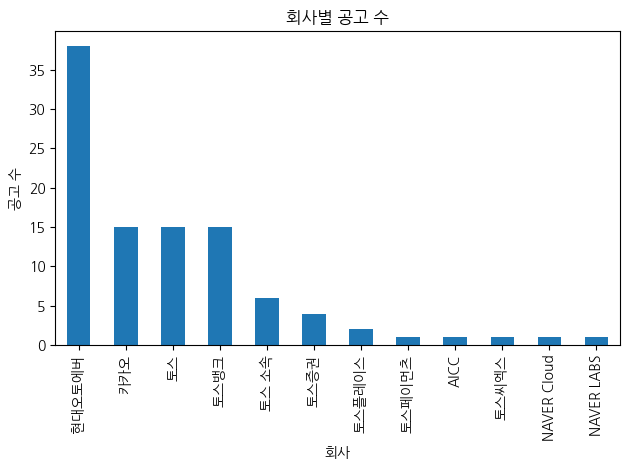

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

df['company'].value_counts().plot(kind='bar')
plt.title("회사별 공고 수")
plt.xlabel("회사")
plt.ylabel("공고 수")
plt.tight_layout()
plt.show()

In [8]:
df.head()

,id,title,company,source_url
0,1,Data Engineer (경력),카카오,https://careers.kakao.com/jobs/P-14271?skillSe...
1,2,추천 시스템 데이터 엔지니어 (경력),카카오,https://careers.kakao.com/jobs/P-14285?skillSe...
2,4,Data Analytics Engineer (경력),카카오,https://careers.kakao.com/jobs/P-14276?skillSe...
3,5,카카오톡 SRE(Site Reliability Engineer) 엔지니어 (경력),카카오,https://careers.kakao.com/jobs/P-14249?skillSe...
4,6,추천 시스템 연구/개발 (경력),카카오,https://careers.kakao.com/jobs/P-14287?skillSe...
